In this notebook I tell you 
- a bit more on how you can use functions
- some ways to handle parameters.

# Functions within function definitions

Let's say we want to define the profit function of a monopolistic firm. This would be price times quantity minus costs:
$$\pi = p*q-c(q)$$
Now costs are a function of quantity and in fact the quantity the monopolist can sell is itself a function of the price he charges. So monopoly profits should actually be written as a function of the price
$$\pi(p)=p*q(p)-c(q(p)).$$
That is, we define one function (the profit) using other functions. The good news is: julia has no problem with that! 

As an example,  let me use linear demand where demand is zero for prices above $1$, and $1-p$ for prices between $0$ and $1$. As cost function, I use quadratic costs, i.e. $c(q)=q^2$.

In [1]:
#cost function
c(q)=q^2

#demand function
function q(p)
    if p>1
        return 0.0
    elseif 0<=p<=1
        return 1-p
    else #this is the case p<0 which makes admittedly not much sense
        return 1.0
    end
end

#profit function
pi(p)=p*q(p)-c(q(p))

pi (generic function with 1 method)

We can now evaluate profits for different prices. For example, we can ask julia what the profit at price $p=0.6$ is.

(To check: demanded quantity will then be $1-0.6=0.4$ and costs will $0.4^2=0.16$. So profits should be $0.6*0.4-0.16=0.08$.)

In [2]:
pi(0.6)

0.07999999999999996

The pi function is -- to julia -- really just an ordinary function and you can do with it all the usual things, e.g. plotting it or maximizing it.

# Parameters

We often have parameters in economic models. For example, costs could be $\alpha q^2$ where $q$ is the quantity and $\alpha>0$ is just some parameter. As we are evaluating everything numerically, we have to assign some number to this parameter. We could decide that for this example the parameter $\alpha$ is 1 and the we would end up with the cost function c(q)$ I used above.

Often it is however interesting to check what happens if we change a parameter (e.g. how will the profit maximizing price change if $\alpha$ and therefore marginal costs decrease). For these kind of comparative statics questions, it is useful to have alpha as a parameter in our code that we can change and see how the results change. There are two ways to do that that I want to describe. The first creates a variable and you can change this variable if you like. The second way uses the parameter as another argument in the function of interest, e.g. the cost function.

## Parameters as variables

Here we create a variable called alpha and assign it the value 0.5. This simply means that in the following code julia will insert 0.5 whenever we write alpha. We can then define the cost function using this alpha and in this case the cost will be $0.5*q^2$. We can evaluate this cost function, for example $c(2)=2$. 

If we want to test a different parameter value, we can simply change the first line where we define alpha, for example to alpha=2.0, and re-evaluate the code. We will then get $c(2)=8$. 

In [3]:
alpha = 0.5
c(q) = alpha*q^2
c(2)

2.0

In [4]:
alpha = 2.0
c(2)

8.0

## Parameters as additional function arguments

Alternatively, we could also think of the cost functions as being a function not only of quantity $q$ but also of the parameter $\alpha$. That is $c(q,\alpha)=\alpha*q^2$. 

This is, of course, possible in julia. We only have to be a bit careful when we want to evaluate this function. This function is a function of two arguments and we cannot call it with, for example, c(2) because julia will not know what alpha value it should use to calculate costs. Instead we have to call the function with, for example, c(2,0.5) which will give us the cost of producing two units when $\alpha$ is 0.5. (By the way: Always make sure that you use the right order of arguments! I define the function below such that q is the first and alpha the second argument.)

I define this function below and call it "cNew" (just not to overwrite the c function that I defined above).

In [1]:
cNew(q,alpha) = alpha*q^2
cNew(2,0.5)

2.0

#### one little hiccup with parameters as function arguments and how to solve it

If you want to plot the cNew function, you might get into a bit of trouble. You might want to plot it as a function of $q$ for some given parameter value, say $\alpha=0.5$. You might try this in the following way, however,...

In [2]:
using Plots
plot(cNew(q,0.5),0.0,1.0)

LoadError: UndefVarError: q not defined

that is a bad idea because Plots expects to get a function name as the first argument and you gave it c(q,0.5) which is not a function name but a function evaluation (and as Plots does not know what q is, it is not even a proper function evaluation).

What you have to do is to create a so called anonymous function:

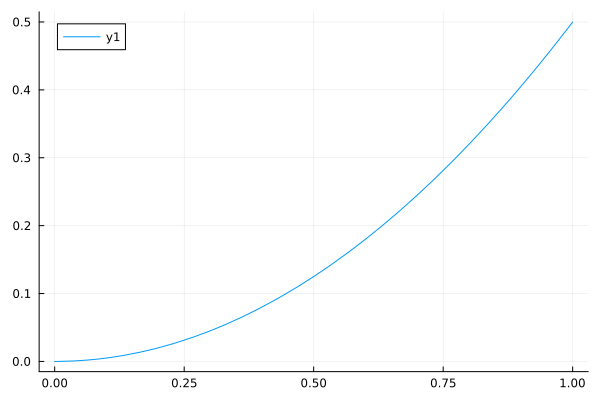

In [3]:
using Plots
plot(q->cNew(q,0.5),0.0,1.0)

What is this magical creation "q->cNew(q,0.5)" ? This is actually a quick and dirty function definition (it defines a function but does not give this function a name which is the slightly dirty part). That is, "q->cNew(q,0.5)" means "assign to every q the value cNew(q,0.5)". It is therefore a function that maps q to cNew(q,0.5). Plots accepts this as a function and plots it.

There is a second way of doing this which defines the function q->cNew(q,0.5) exlicitly and then plots it. Let me call this function "wrapper":

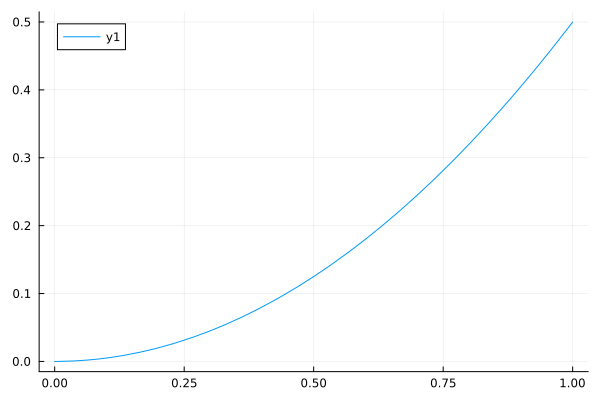

In [4]:
wrapper(q) = cNew(q,0.5)
plot(wrapper,0.0,1.0)

Note that the same problem arises when, for example, instead of plotting you want to maximize a function that has a parameter as argument. (The maximization algorithm cannot know whether it should maximize over the parameter or not.) Again the solution is to use an anonymous function as above or an explicit wrapper.